# Importing Libraries and Fuctions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

In [2]:
df = pd.read_csv('HR_Employee_Attrition_Data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(2940, 35)

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Dropping constant columns

In [48]:
df.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [49]:
df.EmployeeCount.unique() # have to drop it

array([1], dtype=int64)

In [50]:
df.StandardHours.unique() # have to drop it

array([80], dtype=int64)

In [51]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [52]:
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [53]:
df.Over18.unique() #drop

array(['Y'], dtype=object)

In [54]:
df.drop(['EmployeeNumber','StandardHours','EmployeeCount','Over18'],axis=1,inplace=True)
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5


# Checking for null values

In [55]:
df.isnull().sum() #no null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# VISUALISATION

# MATPLOTLIB and SEABORN

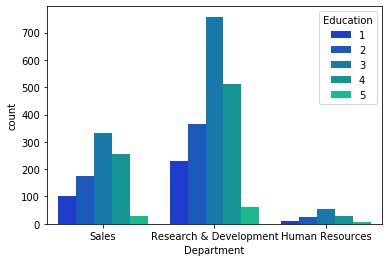

In [56]:
sns.countplot(x=df.Department,hue=df.Education,palette='winter')

C:\Users\Abhishek\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


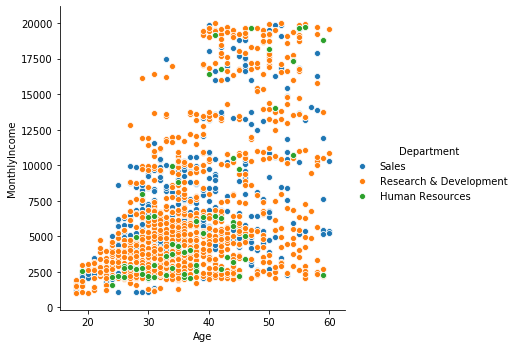

In [57]:
sns.pairplot(data= df,x_vars='Age',y_vars='MonthlyIncome',hue='Department',size=5)

In [58]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7


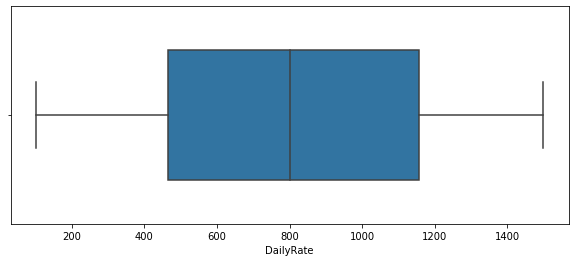

In [59]:
plt.figure(figsize=(10,4))# Even though boxplot is seaborn its size can be controlled by plt figsize command
sns.boxplot(df.DailyRate,orient='h',width=0.6)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ebc979cb48>,
 'caps': [<matplotlib.lines.Line2D at 0x1ebc979f488>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ebc979c3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1ebc97a4408>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ebc97a4d08>],
 'means': []}

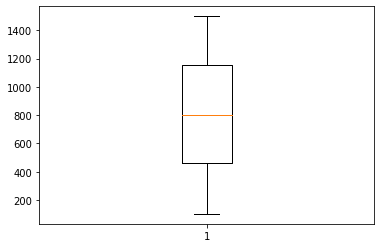

In [60]:
plt.boxplot(df.DailyRate)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


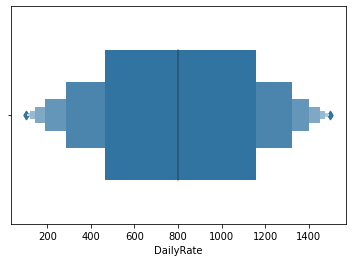

In [61]:
sns.boxenplot(df.DailyRate,orient='h',width=0.6)

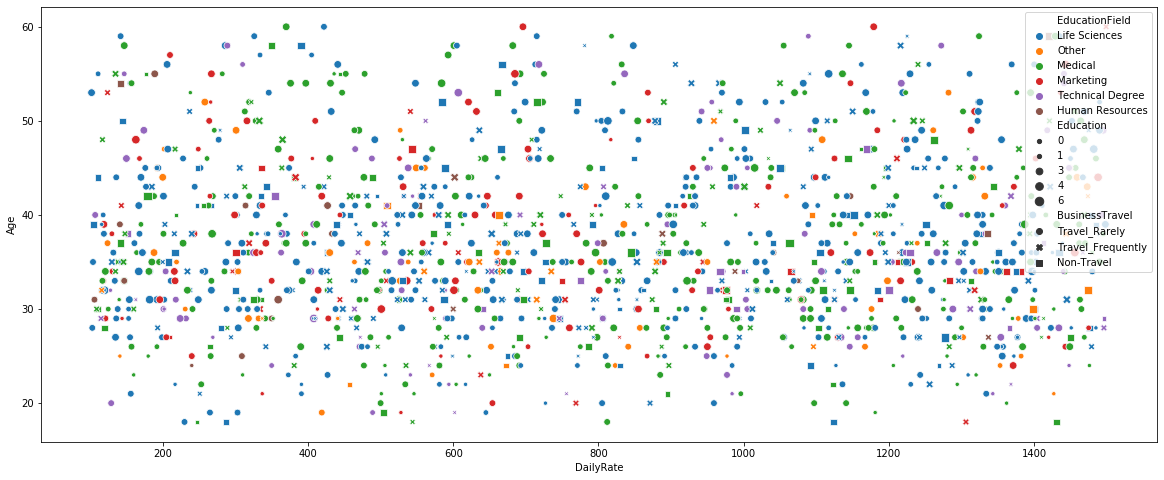

In [62]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df.DailyRate,y=df.Age,hue=df.EducationField,size=df.Education,style=df.BusinessTravel)

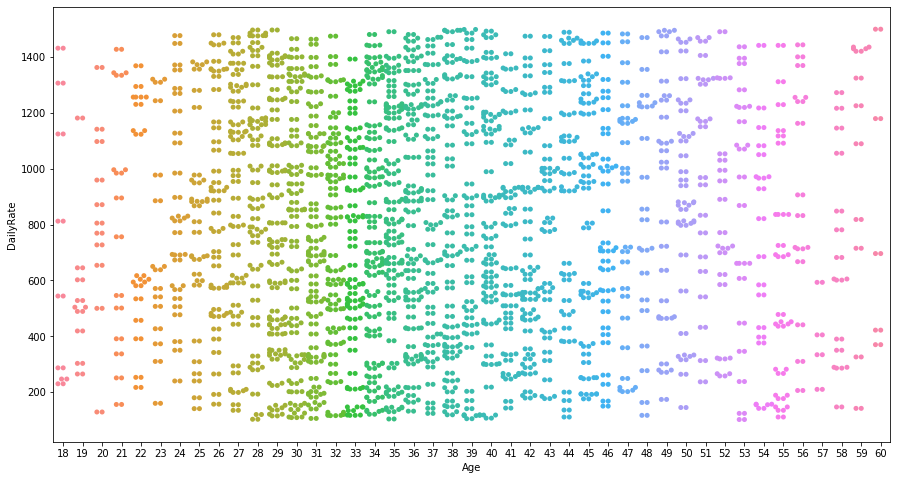

In [63]:
plt.figure(figsize=(15,8))
sns.swarmplot(df.Age,df.DailyRate)

In [64]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7


# Data Mapping

In [65]:
df.Attrition.unique() # Have to do encoding 0,1 using .map

array(['Yes', 'No'], dtype=object)

In [66]:
df['OverTime'] = df.Attrition.map({'No':0,'Yes':1})

In [67]:
# encoding 'Attrtion'
df['Attrition'] = df.Attrition.map({'No':0,'Yes':1})
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7


In [68]:
df.Gender.unique() # Have to do encoding 0,1 .map

array(['Female', 'Male'], dtype=object)

In [69]:
# encoding 'Gender'
df['Gender'] = df.Gender.map({'Male':1,'Female':0})
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7


# CHECKING CORRELATION

In [70]:
cor= df.corr()
cor

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,-0.036311,0.024287,0.029820,0.509604,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,-0.011716,0.023381,0.046135,0.002966,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,-0.001851,0.031131,0.008783,0.005303,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,-0.016547,0.016775,0.042438,0.101589,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,0.000508,-0.049857,-0.008278,0.001212,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.011716,-0.001851,-0.016547,0.000508,1.000000,-0.000478,0.017960,-0.039403,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,-0.000478,1.000000,0.042861,-0.027853,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.017960,0.042861,1.000000,-0.012630,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.039403,-0.027853,-0.012630,1.000000,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


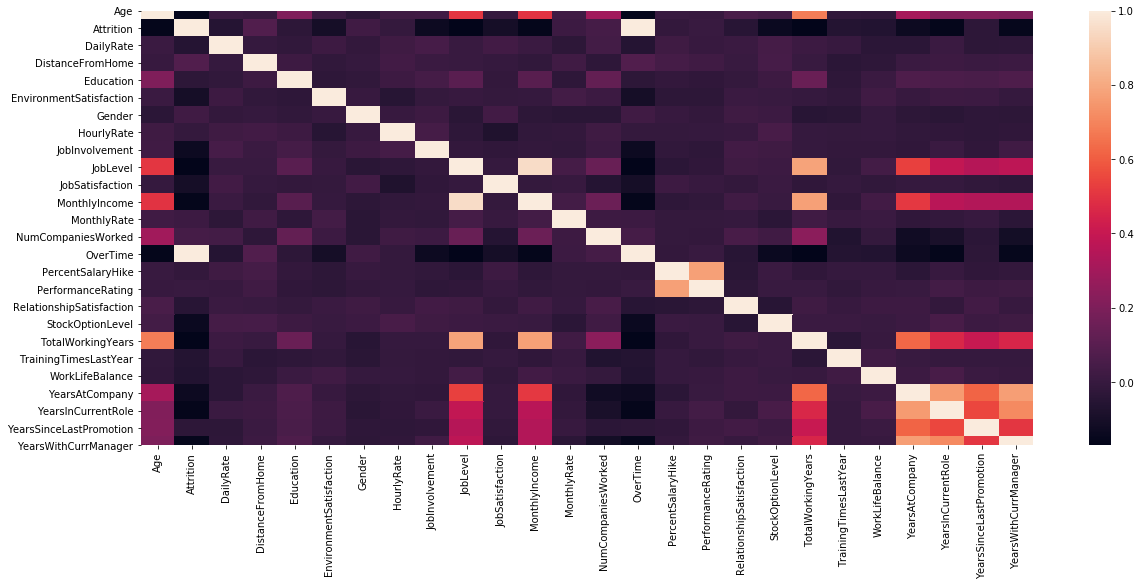

In [71]:
plt.figure(figsize=(20,8)) #joblevel and monthly income highly corelated, age, percentage salary hike,yearsat company
sns.heatmap(cor)#yearsince lasrt promotion

In [72]:
df.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5


# Removing  highly correlated  columns
    joblevel and monthly income highly corelated, age, percentage salary hike,yearsat company

In [73]:
df2= df.drop(['JobLevel','Age','PercentSalaryHike','YearsAtCompany','YearsSinceLastPromotion'],axis=1,inplace=False)
df2.head(1)

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager
0,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,94,...,8,1,3,1,0,8,0,1,4,5


In [74]:
cor_=df2.corr()
cor_

,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager
Attrition,1.000000,-0.056652,0.077924,-0.031373,-0.103369,0.029453,-0.006846,-0.130016,-0.103481,-0.159840,...,0.043494,1.000000,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.160545,-0.156199
DailyRate,-0.056652,1.000000,-0.004985,-0.016806,0.018355,-0.011716,0.023381,0.046135,0.030571,0.007707,...,0.038153,-0.056652,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,0.009932,-0.026363
DistanceFromHome,0.077924,-0.004985,1.000000,0.021042,-0.016075,-0.001851,0.031131,0.008783,-0.003669,-0.017014,...,-0.029251,0.077924,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.018845,0.014406
Education,-0.031373,-0.016806,0.021042,1.000000,-0.027128,-0.016547,0.016775,0.042438,-0.011296,0.094961,...,0.126317,-0.031373,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.060236,0.069065
EnvironmentSatisfaction,-0.103369,0.018355,-0.016075,-0.027128,1.000000,0.000508,-0.049857,-0.008278,-0.006784,-0.006259,...,0.012594,-0.103369,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.018007,-0.004999
Gender,0.029453,-0.011716,-0.001851,-0.016547,0.000508,1.000000,-0.000478,0.017960,0.033252,-0.031858,...,-0.039147,0.029453,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.041483,-0.030599
HourlyRate,-0.006846,0.023381,0.031131,0.016775,-0.049857,-0.000478,1.000000,0.042861,-0.071335,-0.015794,...,0.022157,-0.006846,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.024106,-0.020123
JobInvolvement,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.017960,0.042861,1.000000,-0.021476,-0.015271,...,0.015012,-0.130016,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,0.008717,0.025976
JobSatisfaction,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,0.033252,-0.071335,-0.021476,1.000000,-0.007157,...,-0.055699,-0.103481,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.002305,-0.027656
MonthlyIncome,-0.159840,0.007707,-0.017014,0.094961,-0.006259,-0.031858,-0.015794,-0.015271,-0.007157,1.000000,...,0.149515,-0.159840,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.363818,0.344079


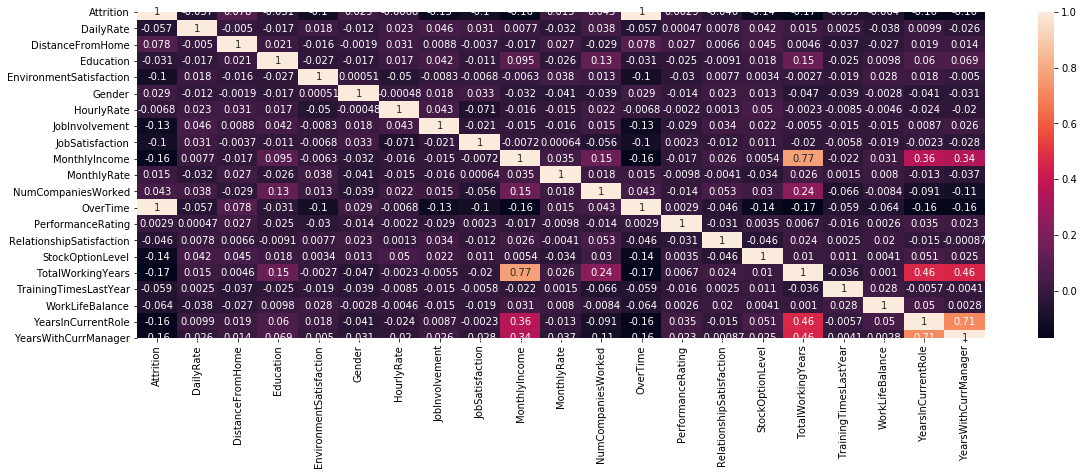

In [75]:
plt.figure(figsize=(19,6)) 
sns.heatmap(cor_, annot=True)

# still some correlation is left

# performing OHE
            There are many columns with categorical data but the values are 1,2,3,4,5 which can be taken as numerical values by mistake sOo we have to convert it into string type and do OHE on them(DOUBT)

In [76]:
df2=pd.get_dummies(df2)
df2.head(2)

,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,1102,1,2,2,0,94,3,4,5993,...,0,0,0,0,0,1,0,0,0,1
1,0,279,8,1,3,1,61,2,2,5130,...,0,0,0,0,1,0,0,0,1,0


In [77]:
df2.isnull().sum()

Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
Gender                               0
HourlyRate                           0
JobInvolvement                       0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsInCurrentRole                   0
YearsWithCurrManager                 0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Human Resources           0
Department_Research & Dev

In [78]:
cor_=df2.corr()
cor_

,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Attrition,1.000000,-0.056652,0.077924,-0.031373,-0.103369,0.029453,-0.006846,-0.130016,-0.103481,-0.159840,...,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419
DailyRate,-0.056652,1.000000,-0.004985,-0.016806,0.018355,-0.011716,0.023381,0.046135,0.030571,0.007707,...,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835
DistanceFromHome,0.077924,-0.004985,1.000000,0.021042,-0.016075,-0.001851,0.031131,0.008783,-0.003669,-0.017014,...,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445
Education,-0.031373,-0.016806,0.021042,1.000000,-0.027128,-0.016547,0.016775,0.042438,-0.011296,0.094961,...,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168
EnvironmentSatisfaction,-0.103369,0.018355,-0.016075,-0.027128,1.000000,0.000508,-0.049857,-0.008278,-0.006784,-0.006259,...,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035
Gender,0.029453,-0.011716,-0.001851,-0.016547,0.000508,1.000000,-0.000478,0.017960,0.033252,-0.031858,...,0.067793,-0.033880,-0.065197,-0.006121,0.009745,-0.005348,-0.028877,0.046076,-0.007804,-0.032752
HourlyRate,-0.006846,0.023381,0.031131,0.016775,-0.049857,-0.000478,1.000000,0.042861,-0.071335,-0.015794,...,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436
JobInvolvement,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.017960,0.042861,1.000000,-0.021476,-0.015271,...,-0.022724,0.017112,-0.021939,0.015200,0.047604,-0.011413,-0.027282,0.016815,0.028324,-0.045253
JobSatisfaction,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,0.033252,-0.071335,-0.021476,1.000000,-0.007157,...,-0.015710,-0.005620,-0.013747,-0.006217,0.020503,0.012604,0.001413,-0.015197,-0.010315,0.024571
MonthlyIncome,-0.159840,0.007707,-0.017014,0.094961,-0.006259,-0.031858,-0.015794,-0.015271,-0.007157,1.000000,...,-0.320906,0.619573,0.055684,0.485818,-0.345180,0.047792,-0.201514,0.032203,0.056767,-0.089361


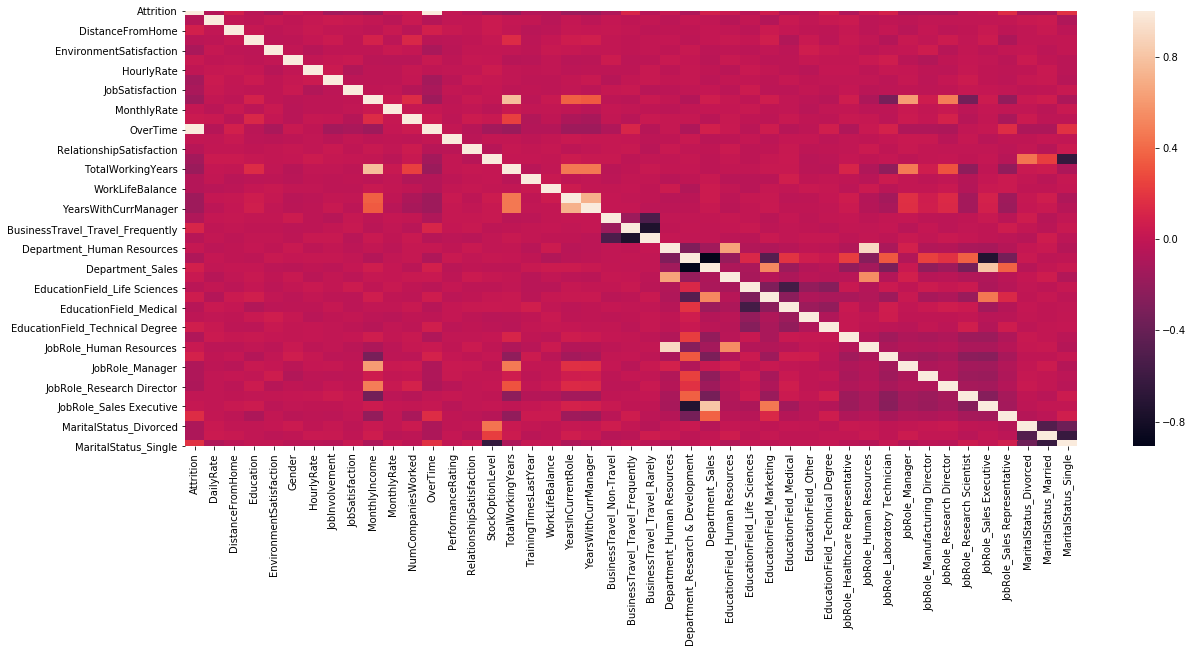

In [79]:
plt.figure(figsize=(20,8))
sns.heatmap(cor_)

# Removing highly correlated collumns once again

In [80]:
df3= df2.drop(['JobRole_Human Resources','JobRole_Sales Executive','OverTime','Department_Sales'],axis=1,inplace=False)
df3.head(1)

,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,1102,1,2,2,0,94,3,4,5993,...,0,0,0,0,0,0,0,0,0,1


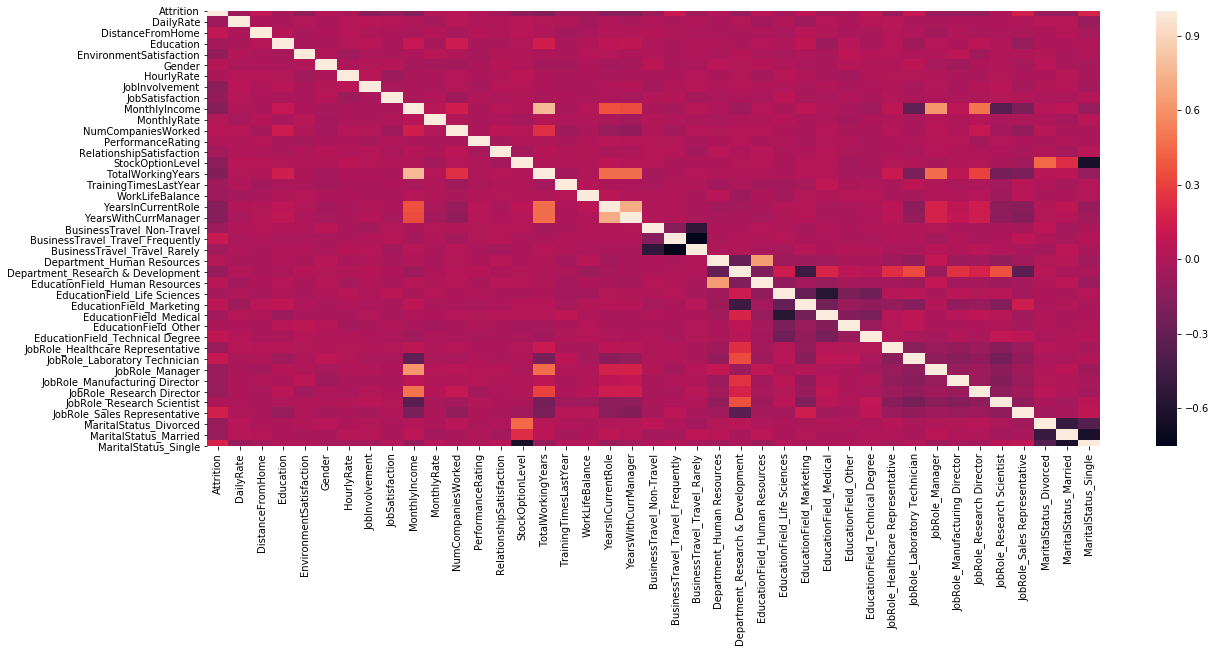

In [81]:
cor_=df3.corr()
plt.figure(figsize=(20,8))
sns.heatmap(cor_)

In [82]:
## few important functions/methods from sklearn package
from sklearn.linear_model import RidgeClassifierCV,RidgeCV, LinearRegression, LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import cross_val_score,KFold, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC,SVR
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import accuracy_score,auc, f1_score,confusion_matrix
from sklearn.impute import SimpleImputer

In [83]:
df3.columns

Index(['Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research S

# spliting training data into train and validation sets

In [84]:
X = df3[['DailyRate', 'DistanceFromHome', 'Education','EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement','JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsInCurrentRole', 'YearsWithCurrManager','BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely', 'Department_Human Resources','Department_Research & Development','EducationField_Human Resources', 'EducationField_Life Sciences','EducationField_Marketing', 'EducationField_Medical','EducationField_Other', 'EducationField_Technical Degree','JobRole_Healthcare Representative', 'JobRole_Laboratory Technician','JobRole_Manager', 'JobRole_Manufacturing Director','JobRole_Research Director', 'JobRole_Research Scientist','JobRole_Sales Representative', 'MaritalStatus_Divorced','MaritalStatus_Married', 'MaritalStatus_Single']]
y = df3[['Attrition']]

In [85]:
X.shape

(2940, 40)

In [86]:
y.shape

(2940, 1)

# will use scaling if needed

In [87]:
scale  = StandardScaler()
scale  = scale.fit(X)
X_     = scale.transform(X)  # scaling train features

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=56, stratify = y)

In [89]:
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2940, 40)
(2940, 1)
(2352, 40)
(588, 40)
(2352, 1)
(588, 1)


# Model Building

In [90]:
# logistic regression

In [91]:
#### base model
model_cl = LogisticRegression()
model_cl = model_cl.fit(X_train , y_train) #### training 

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [92]:
train_pred = model_cl.predict(X_train)
test_pred  = model_cl.predict(X_test)

In [93]:
### model evaluation
print('Train Accuracy',accuracy_score(y_train, train_pred)) ####
print('Test/validation Accuracy',accuracy_score(y_test, test_pred))

Train Accuracy 0.8626700680272109
Test/validation Accuracy 0.8622448979591837


In [94]:
model_cl

LogisticRegression()

In [95]:
param = {'C':[0.1,1,10],
        'penalty':['l1','l2'] }

gs = GridSearchCV(estimator=model_cl, param_grid=param, scoring='accuracy', cv = 3,
                 n_jobs= -1)

In [96]:
## fit
gs = gs.fit(X_train, y_train)

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [97]:
gs.best_score_

0.8575680272108843

In [98]:
gs.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [99]:
## accuracy on validation dataset
accuracy_score(y_test, gs.predict(X_test))

0.8622448979591837

# Randomforest classifier

In [100]:
#### Randomforest classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
print(accuracy_score(y_train, model_rf.predict(X_train)))
print(accuracy_score(y_test, model_rf.predict(X_test)))

C:\Users\Abhishek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1.0
0.9659863945578231


In [101]:
RandomForestClassifier()

RandomForestClassifier()

In [102]:
#### Randomforestclassifier

param = {'max_depth':[1,2,3,4],
        'max_features':['auto','sqrt'] }

In [103]:
gs_r = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param, scoring='accuracy', cv = 3,
                 n_jobs= -1)

In [104]:
gs_r = gs_r.fit(X_train, y_train)
print(accuracy_score(y_train, gs_r.predict(X_train)))
print(accuracy_score(y_test, gs_r.predict(X_test)))

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.8524659863945578
0.8452380952380952


# Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(X_train, y_train)
model_dt_2_score_train = model_dt_2.score(X_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(X_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.8456632653061225
Testing score:  0.8384353741496599


In [107]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=16)
model_dt_2.fit(X_train, y_train)
model_dt_2_score_train = model_dt_2.score(X_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(X_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  1.0
Testing score:  0.9387755102040817


In [114]:
#Decision tree

model_dt = DecisionTreeClassifier(max_depth = 8, criterion ="entropy")
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict_proba(X_test)[:, 1]

In [109]:
predictions = model_dt.predict(X_test)

# Model Accuracy
print (model_dt.score(X_test, y_test))
y_actual_result = y_test

0.891156462585034


In [110]:
print (confusion_matrix(y_test, predictions))

[[485   8]
 [ 56  39]]


In [111]:
accuracy_score(y_test, predictions)

0.891156462585034

# area under curve

In [115]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

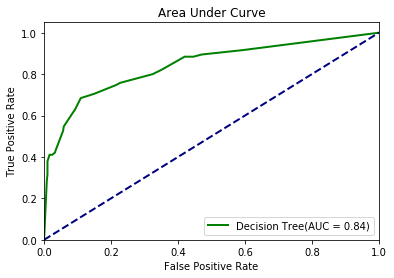

In [67]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

# SVM 

In [68]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score:
0.8860544217687075


In [69]:
# linear kernal

In [70]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score:
0.8384353741496599


In [71]:
# polynomial kernal

In [72]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score:
0.8843537414965986


In [73]:
# radial kernal
y_test.shape

(588, 1)

In [74]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score:
0.8860544217687075
